<a href="https://colab.research.google.com/github/Rochit02/ML-lab/blob/main/Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import os
os.environ['PYDEVD_DISABLE_FILE_VALIDATION'] = '1'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

np.random.seed(42)

In [11]:
FILEPATH = 'hdd_dataset.csv'
try:
    df = pd.read_csv(FILEPATH)
    features = ['capacity_bytes', 'is_legacy_format', 'smart_1_normalized', 'smart_1_raw']
    target = 'failure'

    imputer = SimpleImputer(strategy='median')
    X = imputer.fit_transform(df[features])
    y = df[target].values.astype(float)  # for regression compatibility

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=None)

    print("Data loaded successfully!")
    print(f"X shape: {X.shape}, y shape: {y.shape}")

except FileNotFoundError:
    print(f"Error: File '{FILEPATH}' not found")
    exit()

Data loaded successfully!
X shape: (304957, 4), y shape: (304957,)


In [12]:
def regression_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} -> MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.4f}, R²: {r2:.4f}")
    return mse, rmse, mape, r2

In [13]:
print("\nA1 & A2: Linear Regression with one attribute")
X_train_1 = X_train[:, [0]]  # First feature only
X_test_1 = X_test[:, [0]]

reg_single = LinearRegression().fit(X_train_1, y_train)
y_train_pred_1 = reg_single.predict(X_train_1)
y_test_pred_1 = reg_single.predict(X_test_1)

regression_metrics(y_train, y_train_pred_1, label="Train (1 feature)")
regression_metrics(y_test, y_test_pred_1, label="Test (1 feature)")


A1 & A2: Linear Regression with one attribute
Train (1 feature) -> MSE: 0.0000, RMSE: 0.0048, MAPE: 117615249350.2358, R²: 0.0000
Test (1 feature) -> MSE: 0.0000, RMSE: 0.0033, MAPE: 117926240525.2039, R²: -0.0000


(1.09305462167855e-05,
 np.float64(0.0033061376584748404),
 117926240525.20392,
 -2.474294696530599e-05)

In [14]:
print("\nA3: Linear Regression with all attributes")
reg_multi = LinearRegression().fit(X_train, y_train)
y_train_pred_all = reg_multi.predict(X_train)
y_test_pred_all = reg_multi.predict(X_test)

regression_metrics(y_train, y_train_pred_all, label="Train (all features)")
regression_metrics(y_test, y_test_pred_all, label="Test (all features)")


A3: Linear Regression with all attributes
Train (all features) -> MSE: 0.0000, RMSE: 0.0048, MAPE: 118656030385.3858, R²: 0.0000
Test (all features) -> MSE: 0.0000, RMSE: 0.0033, MAPE: 118889517846.5983, R²: -0.0001


(1.0930830293543238e-05,
 np.float64(0.003306180620223771),
 118889517846.59833,
 -5.0732845457091e-05)

In [15]:
print("\nA4: KMeans Clustering (k=2)")
X_train_clust = X_train.copy()  # without target variable
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clust)

kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X_train_scaled)
print("Cluster labels:", np.unique(kmeans_2.labels_))
print("Cluster centers:\n", kmeans_2.cluster_centers_)


A4: KMeans Clustering (k=2)
Cluster labels: [0 1]
Cluster centers:
 [[ 0.22505148  0.          0.68970037 -0.59302552]
 [-0.43104721  0.         -1.32100185  1.13583789]]


In [16]:
sil = silhouette_score(X_train_scaled, kmeans_2.labels_)
ch = calinski_harabasz_score(X_train_scaled, kmeans_2.labels_)
db = davies_bouldin_score(X_train_scaled, kmeans_2.labels_)
print(f"A5 Scores (k=2) -> Silhouette: {sil:.4f}, CH: {ch:.4f}, DB: {db:.4f}")

A5 Scores (k=2) -> Silhouette: 0.6132, CH: 272305.0508, DB: 0.6934



A6: KMeans for multiple k values


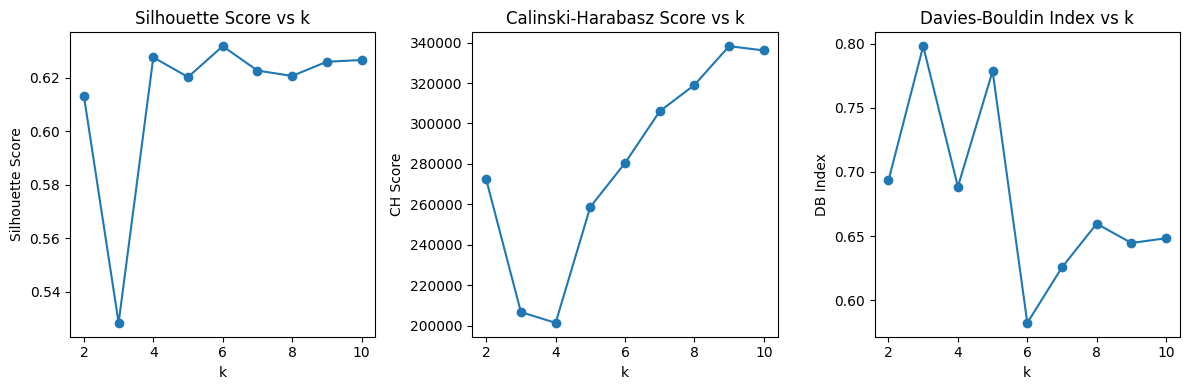

In [17]:
print("\nA6: KMeans for multiple k values")
k_values = range(2, 11)
sil_scores, ch_scores, db_scores = [], [], []

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train_scaled)
    sil_scores.append(silhouette_score(X_train_scaled, km.labels_))
    ch_scores.append(calinski_harabasz_score(X_train_scaled, km.labels_))
    db_scores.append(davies_bouldin_score(X_train_scaled, km.labels_))

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(k_values, sil_scores, marker='o')
plt.title("Silhouette Score vs k")
plt.xlabel("k"); plt.ylabel("Silhouette Score")

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o')
plt.title("Calinski-Harabasz Score vs k")
plt.xlabel("k"); plt.ylabel("CH Score")

plt.subplot(1, 3, 3)
plt.plot(k_values, db_scores, marker='o')
plt.title("Davies-Bouldin Index vs k")
plt.xlabel("k"); plt.ylabel("DB Index")

plt.tight_layout()
plt.show()


A7: Elbow Plot


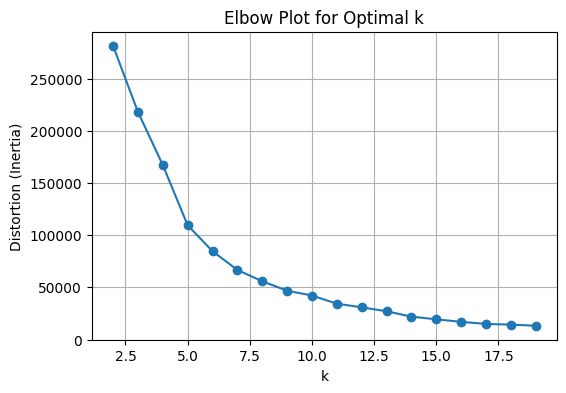

In [18]:
print("\nA7: Elbow Plot")
distortions = []
for k in range(2, 20):
    km = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train_scaled)
    distortions.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(2, 20), distortions, marker='o')
plt.title("Elbow Plot for Optimal k")
plt.xlabel("k"); plt.ylabel("Distortion (Inertia)")
plt.grid(True)
plt.show()